# Introduction

# Methods Section - Gradient Descent

The vanilla Gradient Descent (GD) method optimizes functions by first computing the gradient of the function. Geometrically, the gradient indicates the direction of the steepest ascent. By negating the gradient and multiplying it by a constant learning rate $\alpha$, the algorithm gradually moves the function towards its minimum value.

Mathematically, it can be written as:

$$
\theta^{(t+1)} = \theta^{(t)} - \alpha \, \nabla_{\theta} F(\theta^{(t)})
$$

where  
- $\theta^{(t)}$ are the parameters at iteration $t$
- $\alpha$ is the learning rate  
- $\nabla_{\theta} F(\theta^{(t)})$ is the gradient of the function with respect to $\theta$.  

### Pseudocode

$F(·):=$ Objective function  
$x:=$ Input

Do  
$\hspace{2em}x_{prev}=x $  
$\hspace{2em}x= x_{prev} - \alpha\nabla F(x_{prev}) $

While $ |x - x_{prev}| < $ 1e-6 

return $x$

### Example Code

We first define base classes for C1 and C2 differentiable functions

In [27]:
import numpy as np

class C1Differentiable:
    """base class for C1-differentiable functions."""

    def __init__(self):
        self.__history = []

    def get_history(self):
        return np.array(self.__history)
    
    def add_history(self, x):
        self.__history.append(x)

    def clear_history(self):
        self.__history = []

    def derivative(self, x):
        pass

    def forward(self, x):
        pass



class C2Differentiable(C1Differentiable):
    """base class for C2-differentiable functions."""

    def second_derivative(self, x):
        pass

In [28]:
class GradientDescent:
    """Gradient Descent optimizer."""

    def __init__(self, f: C1Differentiable, x0, alpha=0.01, tol=1e-6, max_iter=2000):
        super().__init__()

        self.f = f # function to minimize
        self.x = x0 # initial point
        self.alpha = alpha # learning rate
        self.tol = tol # tolerance for stopping criterion
        self.max_iter = max_iter # maximum number of iterations

    def optimize(self):
        self.f.clear_history()
        
        for _ in range(self.max_iter):
            grad = self.f.derivative(self.x)
            y = self.f.forward(self.x)

            new_x = self.x - self.alpha * grad
            self.f.add_history([self.x[0], self.x[1], y])
            
            if abs(self.f.forward(new_x) - self.f.forward(self.x)) < self.tol:
                break
            self.x = new_x

        return self.x

# Methods Section - Newton's Method 


Newton's method outperforms vanilla Gradient Descent by introducing an adaptive learning rate. Instead of using a fixed learning rate $\alpha$, Newton's method replaces it with the inverse of the Hessian matrix. This allows the step size to adapt to the local curvature of the function: when the curvature is steep, the algorithm takes smaller steps; when the curvature is flat, it takes larger steps. This adaptive adjustment effectively mitigates the zig-zag problem commonly observed in Gradient Descent.  

Mathematically, it can be written as:

$$
\theta^{(t+1)} = \theta^{(t)} - H^{-1}(\theta^{(t)}) \, \nabla_{\theta} F(\theta^{(t)})
$$

where  
- $\theta^{(t)}$ are the parameters at iteration $t$  
- $H(\theta^{(t)})$ is the Hessian matrix of second derivatives at iteration $t$  
- $ \nabla_{\theta} F(\theta^{(t)}) $ is the gradient of the function with respect to $\theta$.

### Pseudocode

$F(·):=$ Objective function  
$x:=$ Input

Do  
$\hspace{2em}x_{prev}=x $  
$\hspace{2em}x= x_{prev} - H^{-1}(x_{prev}) \, \nabla F(x_{prev}) $

While $ |x - x_{prev}| < $  1e-6 

return $x$

### Example Code

In [29]:
class GradientDescentNewton:
    """Gradient Descent optimizer."""

    def __init__(self, f: C1Differentiable, x0, tol=1e-6, max_iter=2000):
        super().__init__()
        
        self.f = f # function to minimize
        self.x = x0 # initial point
        self.tol = tol # tolerance for stopping criterion
        self.max_iter = max_iter # maximum number of iterations

    def optimize(self):
        self.f.clear_history()

        for _ in range(self.max_iter):
            grad = self.f.derivative(self.x)
            H_inverse = np.linalg.inv(self.f.second_derivative(self.x))
            y = self.f.forward(self.x)

            new_x = self.x - H_inverse @ grad
            self.f.add_history([self.x[0], self.x[1], y])
            
            if abs(self.f.forward(new_x) - self.f.forward(self.x)) < self.tol:
                break

            self.x = new_x
            
        return self.x

# Methods Section - AdaGrad


Newton's method often outperforms vanilla Gradient Descent by introducing an adaptive learning rate through the inverse of the Hessian matrix. However, computing the inverse of the Hessian has a time complexity of $O(d^3)$, which becomes impractical when dealing with a large number of parameters. 

To address this, AdaGrad introduces an alternative adaptive learning rate by leveraging historical gradients. The key idea is that if certain parameters consistently have large gradients, their learning rate should shrink, while parameters with infrequent updates should maintain a relatively larger learning rate. This helps balance convergence across all parameters.

Mathematically, it can be written as

$$
\theta^{(t+1)} = \theta^{(t)} - \frac{\eta}{\sqrt{G_t + \epsilon}} \odot \nabla_{\theta} F(\theta^{(t)})
$$

where
- $\theta^{(t)}$ are the parameters at iteration $t$
- $\eta$ is the initial learning rate  
- $\nabla_{\theta} F(\theta^{(t)})$ is the gradient of the function with respect to $\theta$ at iteration $t$  
- $G_t = \sum_{\tau=1}^t \big( \nabla_{\theta} F(\theta^{(\tau)}) \big)^2$ is the sum of squared historical gradients (accumulated per parameter)  
- $\epsilon$ is a small constant added to avoid singularity
- $\odot$ denotes element-wise division  

### Pseudocode

$F(·):=$ Objective function  
$x:=$ Input  
$G:=$ 0 (same shape as θ)  
$\epsilon:=$ 1e-8

Do  
$\hspace{2em}x_{prev}=x $  
$\hspace{2em}g=\nabla F(x_{prev}) $  
$\hspace{2em}G=G + g \odot g $  
$\hspace{2em}x= x_{prev} - \frac{\eta}{\sqrt{G + \epsilon}} \odot g $

While $ |x - x_{prev}| <$  1e-6 

return $x$

# Methods Section - Adam

The Adam (Adaptive Moment Estimation) optimizer improves upon vanilla Gradient Descent by combining the benefits of **Momentum** and **RMSProp**.  
Adam maintains two moving averages:  

1. **First moment (mean of gradients)** — captures the direction of past gradients (like Momentum).  
2. **Second moment (uncentered variance of gradients)** — scales the step size by the magnitude of past gradients (like RMSProp).  

Both estimates are bias-corrected to counteract initialization at zero. This adaptive mechanism allows Adam to adjust learning rates individually for each parameter, ensuring stable and efficient convergence, especially in high-dimensional or sparse settings.

Mathematically, it can be written as


**First moment estimate:**
$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1)\nabla_{\theta} F(\theta^{(t)})

$$ 
**Second moment estimate:**
$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2)\big(\nabla_{\theta} F(\theta^{(t)})\big)^2
$$

**Bias correction:**
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

**Final parameter update:**
$$
\theta^{(t+1)} = \theta^{(t)} - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$

where  
- $\theta^{(t)}$: parameters at iteration $t$  
- $\nabla_{\theta} F(\theta^{(t)})$: gradient of the loss function with respect to $\theta$  
- $m_t$: first moment (exponential moving average of gradients)  
- $v_t$: second moment (exponential moving average of squared gradients)  
- $\hat{m}_t, \hat{v}_t$: bias-corrected estimates  
- $\alpha$: learning rate  
- $\beta_1, \beta_2$: decay rates for the moving averages (commonly $\beta_1 = 0.9, \beta_2 = 0.999$)  
- $\epsilon$: small constant for numerical stability 

### Pseudocode

# Results Section - Convex bowl

We first define a Convex bowl class. Then, we selected three random initial points $(-1, 2), (-2, 0.5)$ and $(3, 3)$ with step sizes of $0.1, 0.01, 0.001$

In [30]:
class ConvexBowl(C2Differentiable):
    """Convex bowl function."""

    def forward(self, x):
        return x[0]**2 + x[1]**2

    def derivative(self, x):
        return np.array([2*x[0], 2*x[1]])
    
    def second_derivative(self, x):
        return np.array([[2, 0], [0, 2]])

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Plot3D(f, history):
    # Surface grid
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)

    # generate surface
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = f(np.array([X[i, j], Y[i, j]]))

    # Create 3D plot
    fig = plt.figure(figsize=(4, 3))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, Y, Z, alpha=0.3, linewidth=0, antialiased=True)

    #Create path
    ax.plot3D(history[:,0], history[:,1], history[:, 2], linewidth=2)  # line
    ax.scatter3D(history[:,0], history[:,1], history[:, 2], s=18)


    plt.tight_layout(); plt.show()



### Following code demonstrates the results of Vanilla GD

In [32]:
def VanillaGDConvexBowlPlot(x0):
    f = ConvexBowl()

    #alpha 0.1
    optimizer = GradientDescent(f, x0, alpha=0.1)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters alpha 0.1 :", result)
    Plot3D(f.forward, history)

    #alpha 0.01
    optimizer = GradientDescent(f, x0, alpha=0.01)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters alpha 0.01 :", result)
    Plot3D(f.forward, history)

    #alpha 0.001
    optimizer = GradientDescent(f, x0, alpha=0.001)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters alpha 0.001 :", result)
    Plot3D(f.forward, history)

Initial point $(-1, 2)$, step size $0.1, 0.01$ and $0.001$

Optimized parameters alpha 0.1 : [-0.00063383  0.00126765]


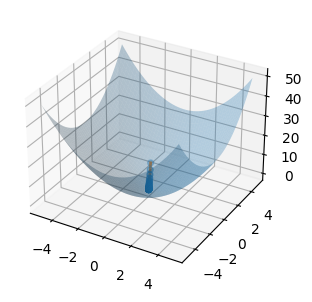

Optimized parameters alpha 0.01 : [-0.00224014  0.00448028]


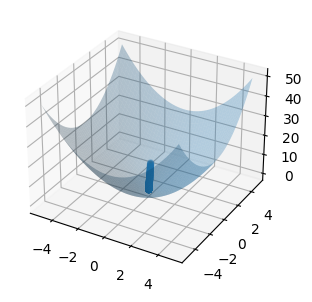

Optimized parameters alpha 0.001 : [-0.01824243  0.03648485]


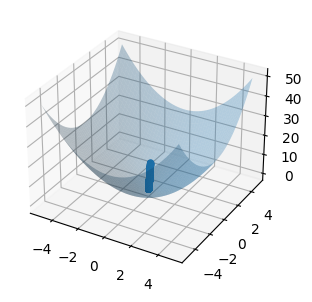

In [33]:
VanillaGDConvexBowlPlot(np.array([-1.0, 2.0]))

Initial point $(-2, 0.5)$, step size $0.1, 0.01$ and $0.001$

Optimized parameters alpha 0.1 : [-0.00158456  0.00039614]


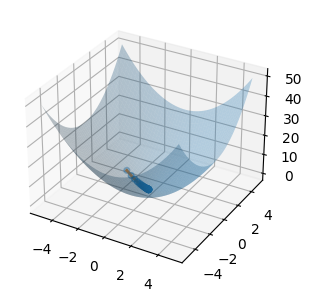

Optimized parameters alpha 0.01 : [-0.00485736  0.00121434]


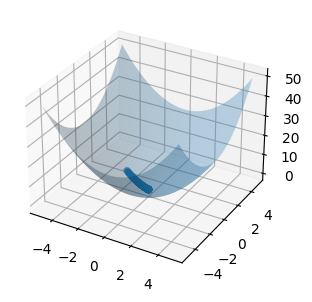

Optimized parameters alpha 0.001 : [-0.03648485  0.00912121]


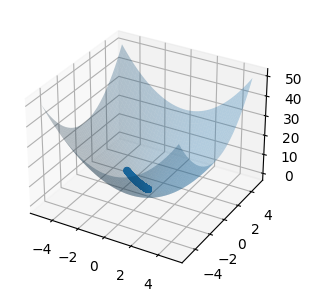

In [34]:
VanillaGDConvexBowlPlot(np.array([-2.0, 0.5]))

Initial point $(3, 3)$, step size $0.1, 0.01$ and $0.001$

Optimized parameters alpha 0.1 : [0.00097356 0.00097356]


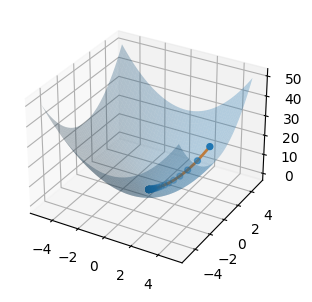

Optimized parameters alpha 0.01 : [0.00352071 0.00352071]


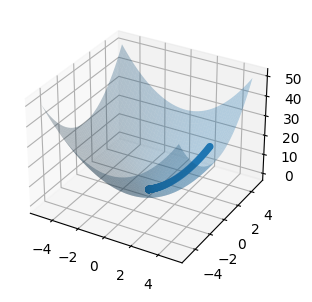

Optimized parameters alpha 0.001 : [0.05472728 0.05472728]


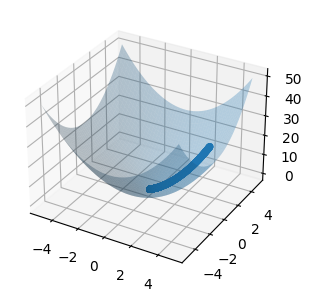

In [35]:
VanillaGDConvexBowlPlot(np.array([3, 3]))

### Following code demonstrates the results of GD - Newton's Method

In [71]:
def GDNewtonConvexBowlPlot(x0):
    f = ConvexBowl()

    optimizer = GradientDescentNewton(f, x0)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters ", x0, result)
    Plot3D(f.forward, history)

Initial points $(-1, 2), (-2, 0.5)$ and $(3, 3)$

Optimized parameters  [-1  2] [0. 0.]


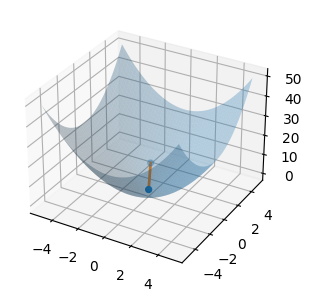

Optimized parameters  [-2.   0.5] [0. 0.]


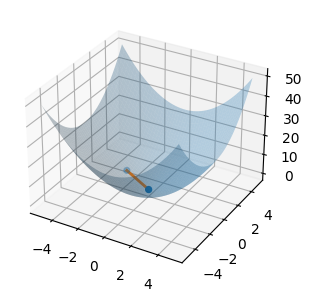

Optimized parameters  [3 3] [0. 0.]


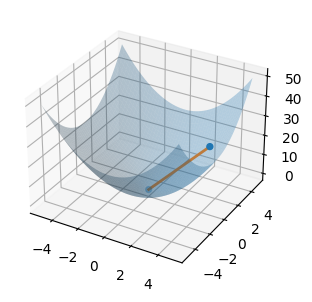

In [72]:
GDNewtonConvexBowlPlot(np.array([-1, 2]))
GDNewtonConvexBowlPlot(np.array([-2, 0.5]))
GDNewtonConvexBowlPlot(np.array([3, 3]))

# Results Section - Rosenbrock

We first define a Rosenbrock class. Then, we selected three random initial points $(-3, 4), (2.5, -2.5)$ and $(0, 4)$ with step sizes of $0.1, 0.001, 0.00001$

In [69]:
class Rosenbrock(C2Differentiable):
    """Rosenbrock function."""

    def forward(self, x):
        return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

    def derivative(self, x):
        dfdx0 = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
        dfdx1 = 200 * (x[1] - x[0]**2)
        return np.array([dfdx0, dfdx1])
    
    def second_derivative(self, x):
        d2fdx0_2 = 2 - 400 * (x[1] - x[0]**2) + 800 * x[0]**2
        d2fdx1_2 = 200
        d2fdx0dx1 = -400 * x[0]
        return np.array([[d2fdx0_2, d2fdx0dx1], [d2fdx0dx1, d2fdx1_2]])

### Following code demonstrates the results of Vanilla GD

In [76]:
def VanillaGDRosenbrockPlot(x):
    f = Rosenbrock()

    #alpha 0.1
    optimizer = GradientDescent(f, x, alpha=0.1)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters ", x, result)
    Plot3D(f.forward, history)

    #alpha 0.001
    optimizer = GradientDescent(f, x, alpha=0.001)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters ", x, result)
    Plot3D(f.forward, history)

    #alpha 0.00001
    optimizer = GradientDescent(f, x, alpha=0.00001)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters ", x, result)
    Plot3D(f.forward, history)

Initial point $(-3, 4)$, step size $0.1, 0.001, 0.00001$

C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:5: RuntimeWarning: overflow encountered in double_scalars
  return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\4004294352.py:23: RuntimeWarning: invalid value encountered in double_scalars
  if abs(self.f.forward(new_x) - self.f.forward(self.x)) < self.tol:
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:8: RuntimeWarning: overflow encountered in double_scalars
  dfdx0 = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:9: RuntimeWarning: overflow encountered in double_scalars
  dfdx1 = 200 * (x[1] - x[0]**2)
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:8: RuntimeWarning: invalid value encountered in doubl

Optimized parameters  [-3  4] [nan nan]


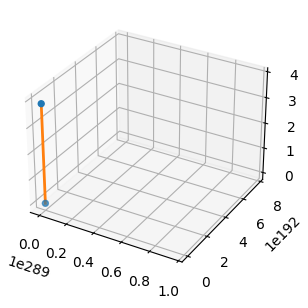

C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:5: RuntimeWarning: overflow encountered in double_scalars
  return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:8: RuntimeWarning: overflow encountered in double_scalars
  dfdx0 = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:9: RuntimeWarning: overflow encountered in double_scalars
  dfdx1 = 200 * (x[1] - x[0]**2)
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:8: RuntimeWarning: invalid value encountered in double_scalars
  dfdx0 = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:9: RuntimeWarning: invalid value encountered in double_scalars
  

Optimized parameters  [-3  4] [nan nan]


C:\Users\otz55\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mpl_toolkits\mplot3d\proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


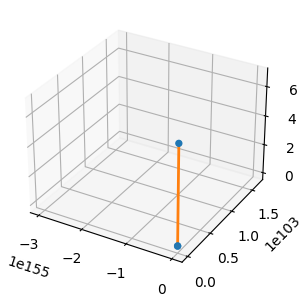

Optimized parameters  [-3  4] [-2.03851432  4.16257039]


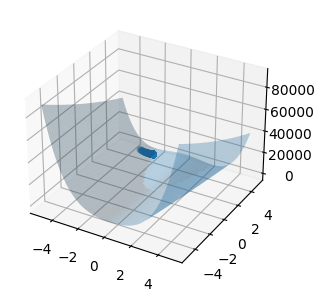

In [66]:
VanillaGDRosenbrockPlot(np.array([-3, 4]))

Initial point $(2.5, -2.5)$, step size $0.1, 0.001, 0.00001$

C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:5: RuntimeWarning: overflow encountered in double_scalars
  return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\4004294352.py:23: RuntimeWarning: invalid value encountered in double_scalars
  if abs(self.f.forward(new_x) - self.f.forward(self.x)) < self.tol:
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:8: RuntimeWarning: overflow encountered in double_scalars
  dfdx0 = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:9: RuntimeWarning: overflow encountered in double_scalars
  dfdx1 = 200 * (x[1] - x[0]**2)
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:8: RuntimeWarning: invalid value encountered in doubl

Optimized parameters  [ 2.5 -2.5] [nan nan]


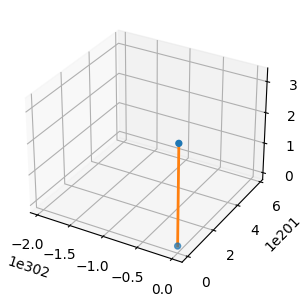

C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:5: RuntimeWarning: overflow encountered in double_scalars
  return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:8: RuntimeWarning: overflow encountered in double_scalars
  dfdx0 = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\4004294352.py:23: RuntimeWarning: invalid value encountered in double_scalars
  if abs(self.f.forward(new_x) - self.f.forward(self.x)) < self.tol:
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\4004294352.py:20: RuntimeWarning: invalid value encountered in subtract
  new_x = self.x - self.alpha * grad
C:\Users\otz55\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mpl_toolkits\mplot3d\proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


Optimized parameters  [ 2.5 -2.5] [nan nan]


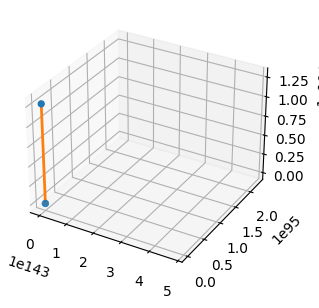

Optimized parameters  [ 2.5 -2.5] [ 0.03903465 -0.03704516]


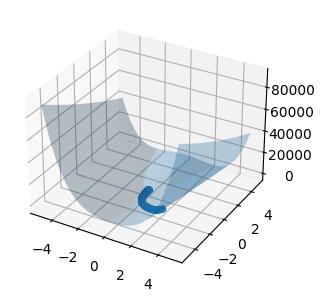

In [67]:
VanillaGDRosenbrockPlot(np.array([2.5, -2.5]))

Initial point $(0, 4)$, step size $0.1, 0.001, 0.00001$

C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:5: RuntimeWarning: overflow encountered in double_scalars
  return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\4004294352.py:23: RuntimeWarning: invalid value encountered in double_scalars
  if abs(self.f.forward(new_x) - self.f.forward(self.x)) < self.tol:
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:8: RuntimeWarning: overflow encountered in double_scalars
  dfdx0 = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:9: RuntimeWarning: overflow encountered in double_scalars
  dfdx1 = 200 * (x[1] - x[0]**2)
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
C:\Users\otz55\AppData\Local\Temp\ipykernel_31012\3772548032.py:8: RuntimeWarning: invalid value encountered in doubl

Optimized parameters  [0 4] [nan nan]


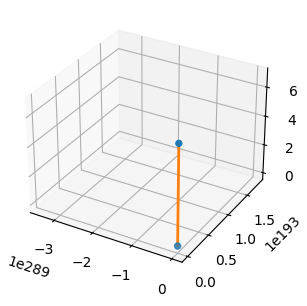

Optimized parameters  [0 4] [0.84970146 0.72133515]


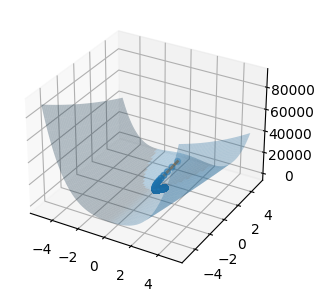

Optimized parameters  [0 4] [0.88285484 0.77965123]


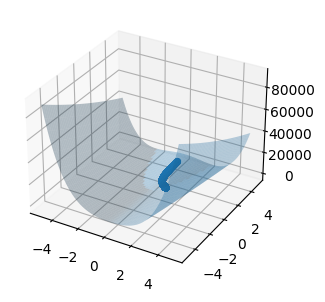

In [68]:
VanillaGDRosenbrockPlot(np.array([0, 4]))

### Following code demonstrates the results of GD - Newton's Method

In [70]:
def GDNewtonRosenbrockPlot(x0):
    f = Rosenbrock()

    optimizer = GradientDescentNewton(f, x0)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters ", x0, result)
    Plot3D(f.forward, history)

Initial points $(-3, 4), (2.5, -2.5)$ and $(0, 4)$

Optimized parameters  [-3  4] [1. 1.]


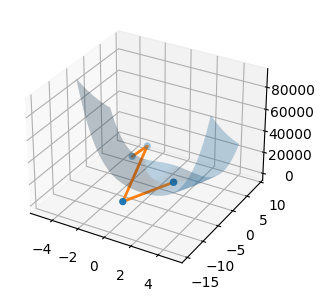

Optimized parameters  [-2.5 -2.5] [1.         0.99999221]


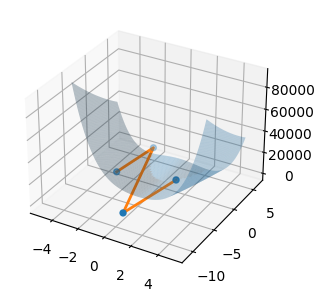

Optimized parameters  [0 4] [0.99968798 0.99937606]


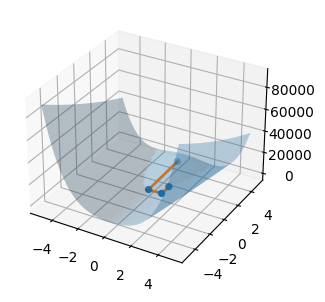

In [95]:
GDNewtonRosenbrockPlot(np.array([-3, 4]))
GDNewtonRosenbrockPlot(np.array([-2.5, -2.5]))
GDNewtonRosenbrockPlot(np.array([0, 4]))

# Results Section - Multimodal non-convex

We first define a MultiModalNonConvex class. Then, we selected three random initial points $(3, 4), (-5, -2)$ and $(-4, 4)$ with step sizes of $0.1, 0.01, 0.001$

In [80]:
import math
class MultimodalNonConvex(C2Differentiable):
    """Multimodal Non-Convex function."""

    def forward(self, x):
        return x[0]**2 + x[1]**2 + 10 * math.cos(x[0]) + 10 * math.sin(x[1])

    def derivative(self, x):
        return np.array([2 * x[0] - 10 * math.sin(x[0]), 2 * x[1] + 10 * math.cos(x[1])])
    
    def second_derivative(self, x):
        return np.array([[2 - 10 * math.cos(x[0]), 0], [0, 2 - 10 * math.sin(x[1])]])

### Following code demonstrates the results of Vanilla GD

In [81]:
def VanillaGDNonConvexPlot(x):
    f = MultimodalNonConvex()

    #alpha 0.1
    optimizer = GradientDescent(f, x, alpha=0.1)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters ", x, result)
    Plot3D(f.forward, history)

    #alpha 0.01
    optimizer = GradientDescent(f, x, alpha=0.01)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters ", x, result)
    Plot3D(f.forward, history)

    #alpha 0.001
    optimizer = GradientDescent(f, x, alpha=0.001)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters ", x, result)
    Plot3D(f.forward, history)

Initial point $(3, 4)$, step size $0.1, 0.01, 0.001$

Optimized parameters  [3 4] [2.59561811 3.83785754]


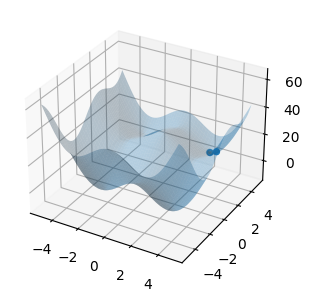

Optimized parameters  [3 4] [2.59631249 3.83838974]


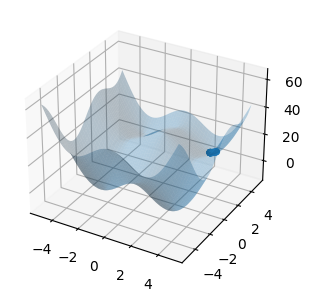

Optimized parameters  [3 4] [2.59793216 3.84001068]


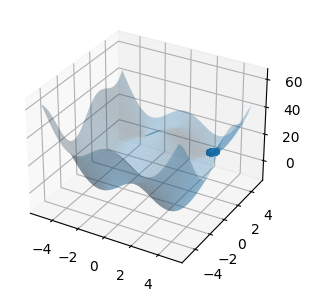

In [82]:
VanillaGDNonConvexPlot(np.array([3, 4]))

Initial point $(-4, 4)$, step size $0.1, 0.01, 0.001$

Optimized parameters  [-4  4] [-2.59563934  3.83785754]


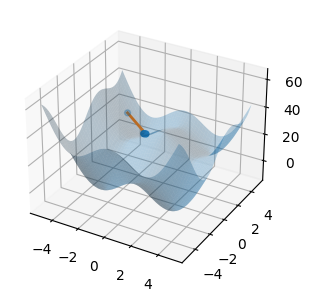

Optimized parameters  [-4  4] [-2.59655911  3.83796582]


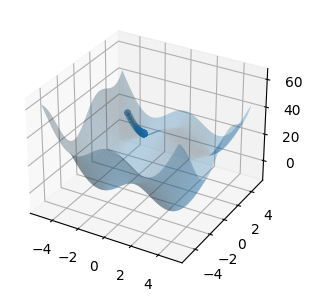

Optimized parameters  [-4  4] [-2.59855849  3.83871755]


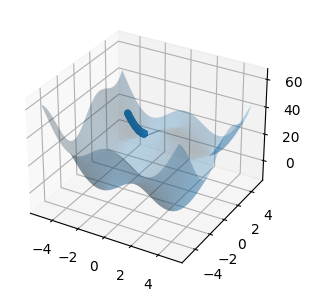

In [94]:
VanillaGDNonConvexPlot(np.array([-4, 4]))

Initial point $(-5, -2)$, step size $0.1, 0.01, 0.001$

Optimized parameters  [-5 -2] [-2.59574624 -1.30635779]


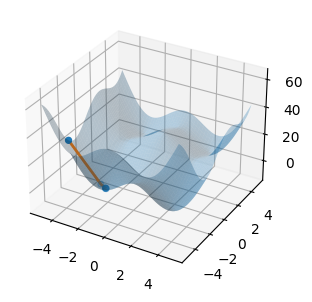

Optimized parameters  [-5 -2] [-2.5966934 -1.3065683]


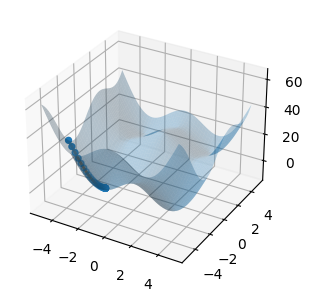

Optimized parameters  [-5 -2] [-2.59866731 -1.30690907]


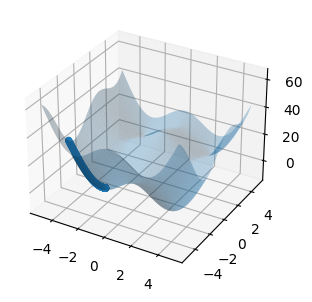

In [90]:
VanillaGDNonConvexPlot(np.array([-5, -2]))

### Following code demonstrates the results of GD - Newton's Method

In [96]:
def GDNewtonNonConvexPlot(x0):
    f = MultimodalNonConvex()

    optimizer = GradientDescentNewton(f, x0)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters ", x0, result)
    Plot3D(f.forward, history)

Initial points $(3, 4), (-5, -2)$ and $(-4, 4)$

Optimized parameters  [3 4] [2.59582213 3.8375083 ]


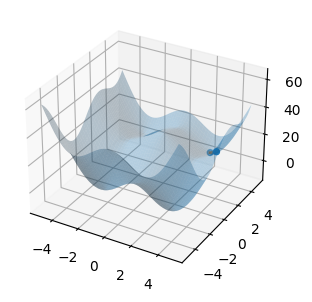

Optimized parameters  [-5 -2] [ 2.84252368e-07 -1.30644001e+00]


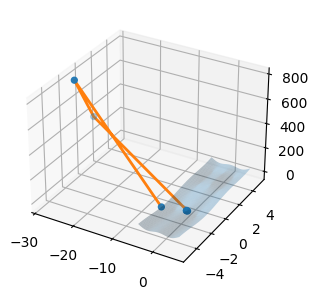

Optimized parameters  [-4  4] [-2.59573963  3.83746711]


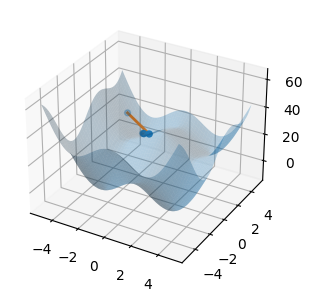

In [97]:
GDNewtonNonConvexPlot(np.array([3, 4]))
GDNewtonNonConvexPlot(np.array([-5, -2]))
GDNewtonNonConvexPlot(np.array([-4, 4]))